In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams.update({'text.usetex': True, 'font.family': 'serif'})

### ***Step 1. Test on single plotting***

In [23]:
# Config Start
task = "tsp"
num_loc = 50
start_ep = 0
end_ep = 50
# Config End

df = pd.read_csv(f"../../data/efficient_sampling/{task}{num_loc}.csv")

am_mean = df.loc[start_ep:end_ep, f"Name: am-{task}-{num_loc} - val/reward"]
am_min  = df.loc[start_ep:end_ep, f"Name: am-{task}-{num_loc} - val/reward__MIN"]
am_max  = df.loc[start_ep:end_ep, f"Name: am-{task}-{num_loc} - val/reward__MAX"]

am_critic_mean = df.loc[start_ep:end_ep, f"Name: am-critic-{task}-{num_loc} - val/reward"]
am_critic_min  = df.loc[start_ep:end_ep, f"Name: am-critic-{task}-{num_loc} - val/reward__MIN"]
am_critic_max  = df.loc[start_ep:end_ep, f"Name: am-critic-{task}-{num_loc} - val/reward__MAX"]

pomo_mean = df.loc[start_ep:end_ep, f"Name: pomo-{task}-{num_loc} - val/reward"]
pomo_min  = df.loc[start_ep:end_ep, f"Name: pomo-{task}-{num_loc} - val/reward__MIN"]
pomo_max  = df.loc[start_ep:end_ep, f"Name: pomo-{task}-{num_loc} - val/reward__MAX"]

symnco_mean = df.loc[start_ep:end_ep, f"Name: symnco-{task}-{num_loc} - val/reward"]
symnco_min  = df.loc[start_ep:end_ep, f"Name: symnco-{task}-{num_loc} - val/reward__MIN"]
symnco_max  = df.loc[start_ep:end_ep, f"Name: symnco-{task}-{num_loc} - val/reward__MAX"]

am_ppo_mean = df.loc[start_ep:end_ep, f"Name: am-ppo-{task}-{num_loc} - val/reward"]
am_ppo_min  = df.loc[start_ep:end_ep, f"Name: am-ppo-{task}-{num_loc} - val/reward__MIN"]
am_ppo_max  = df.loc[start_ep:end_ep, f"Name: am-ppo-{task}-{num_loc} - val/reward__MAX"]

# Construct list for plotting
model_name_list = ["AM Rollout", "AM Critic", "POMO", "Sym-NCO", "AM PPO"]
mean_list = [am_mean, am_critic_mean, pomo_mean, symnco_mean, am_ppo_mean]
min_list = [am_min, am_critic_min, pomo_min, symnco_min, am_ppo_min]
max_list = [am_max, am_critic_max, pomo_max, symnco_max, am_ppo_max]

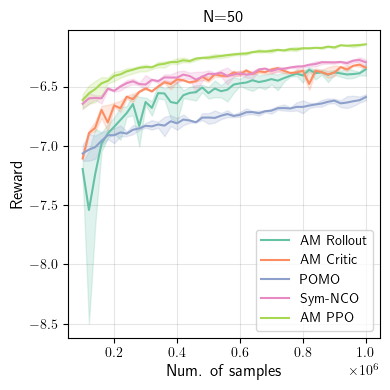

In [24]:
title_font = {'family': 'Arial Black', 'fontsize': 12, 'fontweight': 'bold'}
label_font = {'family': 'Arial Black', 'fontsize': 12}
legend_font = {'family': 'Palatino Linotype', 'size': 10}
text_font = {'family': 'Palatino Linotype', 'fontsize': 14}

fig, ax = plt.subplots(1,figsize=(4, 4))

for model_idx in range(5):
    x = np.arange(start_ep*2e4, (end_ep+1)*2e4, 2e4)
    ax.plot(x, mean_list[model_idx], label=model_name_list[model_idx], color=cm.Set2(model_idx))
    ax.fill_between(x, min_list[model_idx], max_list[model_idx], color=cm.Set2(model_idx), alpha=0.2)

ax.set_xlabel("Num. of samples", fontdict=label_font)
ax.set_ylabel("Reward", fontdict=label_font)
ax.set_title(f"N={num_loc}", fontdict=title_font)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.legend(loc='lower right', prop=legend_font)
ax.grid(axis='both', color='black', alpha=0.1)

plt.tight_layout()

### ***Step 2. Plot all***

In [39]:
def get_plot_data(task, num_loc, start_ep, end_ep):
    df = pd.read_csv(f"../../data/efficient_sampling/{task}{num_loc}.csv")

    am_mean = df.loc[start_ep:end_ep, f"Name: am-{task}-{num_loc} - val/reward"]
    am_min  = df.loc[start_ep:end_ep, f"Name: am-{task}-{num_loc} - val/reward__MIN"]
    am_max  = df.loc[start_ep:end_ep, f"Name: am-{task}-{num_loc} - val/reward__MAX"]

    am_critic_mean = df.loc[start_ep:end_ep, f"Name: am-critic-{task}-{num_loc} - val/reward"]
    am_critic_min  = df.loc[start_ep:end_ep, f"Name: am-critic-{task}-{num_loc} - val/reward__MIN"]
    am_critic_max  = df.loc[start_ep:end_ep, f"Name: am-critic-{task}-{num_loc} - val/reward__MAX"]

    pomo_mean = df.loc[start_ep:end_ep, f"Name: pomo-{task}-{num_loc} - val/reward"]
    pomo_min  = df.loc[start_ep:end_ep, f"Name: pomo-{task}-{num_loc} - val/reward__MIN"]
    pomo_max  = df.loc[start_ep:end_ep, f"Name: pomo-{task}-{num_loc} - val/reward__MAX"]

    symnco_mean = df.loc[start_ep:end_ep, f"Name: symnco-{task}-{num_loc} - val/reward"]
    symnco_min  = df.loc[start_ep:end_ep, f"Name: symnco-{task}-{num_loc} - val/reward__MIN"]
    symnco_max  = df.loc[start_ep:end_ep, f"Name: symnco-{task}-{num_loc} - val/reward__MAX"]

    am_ppo_mean = df.loc[start_ep:end_ep, f"Name: am-ppo-{task}-{num_loc} - val/reward"]
    am_ppo_min  = df.loc[start_ep:end_ep, f"Name: am-ppo-{task}-{num_loc} - val/reward__MIN"]
    am_ppo_max  = df.loc[start_ep:end_ep, f"Name: am-ppo-{task}-{num_loc} - val/reward__MAX"]

    # Construct list for plotting
    model_name_list = ["AM Rollout", "AM Critic", "POMO", "Sym-NCO", "AM PPO"]
    mean_list = [am_mean, am_critic_mean, pomo_mean, symnco_mean, am_ppo_mean]
    min_list = [am_min, am_critic_min, pomo_min, symnco_min, am_ppo_min]
    max_list = [am_max, am_critic_max, pomo_max, symnco_max, am_ppo_max]

    return model_name_list, mean_list, min_list, max_list

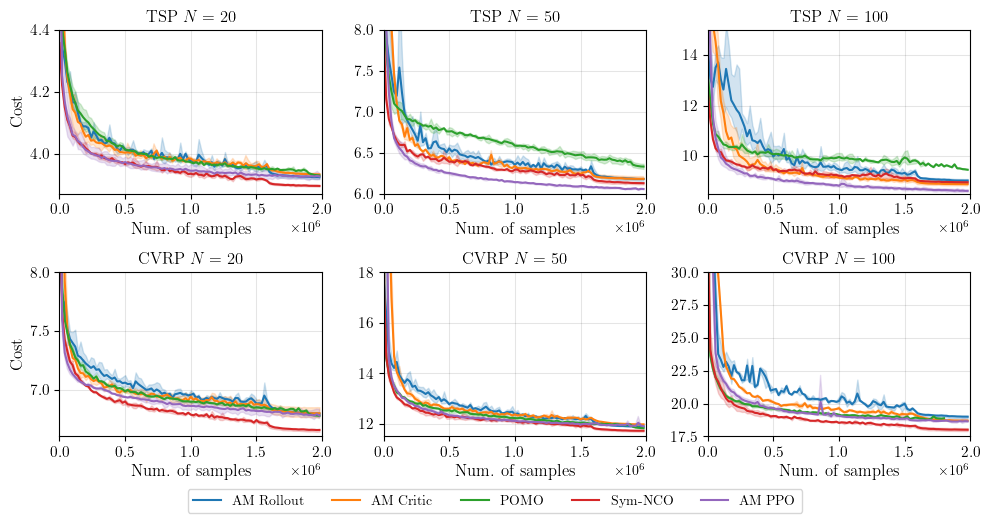

In [40]:
# Config Start
task_list = ["tsp", 'cvrp']
num_loc_list = [20, 50, 100]
start_ep = 0
end_ep = 99
title_list = [
    [r"TSP $N=20$", r"TSP $N=50$", r"TSP $N=100$"],
    [r"CVRP $N=20$", r"CVRP $N=50$", r"CVRP $N=100$"]
]
ylim_upper_list = [
    [4.4, 8, 15],
    [8, 18, 30]
]
ylim_lower_list = [
    [3.87, 6, 8.5],
    [6.6, 11.5, 17.5]
]
color_list = ['C0', 'C1', 'C2', 'C3', 'C4']
# Config End

legend_font = {'size': 10}

fig, axs = plt.subplots(2, 3,figsize=(10, 5))
for num_loc_idx in range(3):
    for task_idx in range(2):
        model_name_list, mean_list, min_list, max_list = get_plot_data(task_list[task_idx], num_loc_list[num_loc_idx], start_ep, end_ep)

        for model_idx in range(5):
            x = np.arange(start_ep*2e4, (end_ep+1)*2e4, 2e4)
            axs[task_idx, num_loc_idx].plot(x, -mean_list[model_idx], label=model_name_list[model_idx], color=color_list[model_idx])
            axs[task_idx, num_loc_idx].fill_between(x, -min_list[model_idx], -max_list[model_idx], color=color_list[model_idx], alpha=0.2)

        # if task_idx == 1:
        axs[task_idx, num_loc_idx].set_xlabel("Num. of samples", fontdict=label_font)
        if num_loc_idx == 0:
            axs[task_idx, num_loc_idx].set_ylabel("Cost", fontdict=label_font)
        axs[task_idx, num_loc_idx].set_xlim(0, 2e6)
        axs[task_idx, num_loc_idx].set_ylim(ylim_lower_list[task_idx][num_loc_idx], ylim_upper_list[task_idx][num_loc_idx])
        axs[task_idx, num_loc_idx].set_yscale('linear')
        axs[task_idx, num_loc_idx].set_xscale('linear')
        axs[task_idx, num_loc_idx].set_title(title_list[task_idx][num_loc_idx])
        axs[task_idx, num_loc_idx].tick_params(axis='both', which='major', labelsize=11)
        # axs[task_idx, num_loc_idx].legend(loc='upper right', prop=legend_font)
        axs[task_idx, num_loc_idx].grid(axis='both', color='black', alpha=0.1)

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=int(len(labels)), bbox_to_anchor=(0.5, -0.05), prop=legend_font)

plt.tight_layout()
plt.savefig(f"../../fig/efficient_sampling.pdf", bbox_inches='tight')